* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-09-02


In [2]:
import pandas as pd
import numpy as np

In [3]:
# target url for the covid19 data: Seoul City
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
# read all table datas in the web html template
tables = pd.read_html(url)
tables

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   68   51  101   92   97   123  151  284  118  140  230  186   95
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2  132  151  221  151   74   142  178  259  144  193  261  145  275,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    68   51  101   92   97  123
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2   151  284  118  140  230  186
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4    95  132  151  221  151   74
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6   142  178  259  144  193  261
 7   강동구   기타  NaN  NaN  NaN  NaN
 8   145  275  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  성북 사랑제일교회  광진 소재병원  강서 보안회사  성북 요양시설관련  중랑 체육시설관련  강남 소재 아파트  \
 0  4062     392        625        8        7          7          5          6   
 
    동작 카드발급업체  광화문 집회 관련  ...  서초 장애인 교육시설  성북 체대입시관련  순복음 강북교회 관련  \
 0         18         89  ...            2         40           20   
 
    제주도 게스트 하우스  도봉 체육시설 관련  구로아파트 관련  금천축산업체 관련  타 시·도 확진자 접촉자    기타  경로 

In [53]:
# index the table with covid19 patient data
tables[-2]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4062,20412,9.01.,영등포구,-,광화문집회 관련,NaN
1,4061,20413,9.01.,강동구,-,광진구 소재병원,NaN
2,4060,20420,9.01.,광진구,-,광진구 소재병원,NaN
3,4059,20399,9.01.,광진구,-,광진구 소재병원,NaN
4,4058,20390,9.01.,강남구,-,서초구 장애인교육시설,NaN
...,...,...,...,...,...,...,...
4057,5,9,1.31.,성북구,-,#5 접촉,퇴원
4058,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
4059,3,6,1.30.,종로구,-,#3 접촉,퇴원
4060,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [55]:
# get number of confirmed cases and numbers of columns
df = tables[-2]
df.shape

(4062, 7)

In [56]:
# peek at the dataframe
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4062,20412,9.01.,영등포구,-,광화문집회 관련,NaN
1,4061,20413,9.01.,강동구,-,광진구 소재병원,NaN
2,4060,20420,9.01.,광진구,-,광진구 소재병원,NaN
3,4059,20399,9.01.,광진구,-,광진구 소재병원,NaN
4,4058,20390,9.01.,강남구,-,서초구 장애인교육시설,NaN


In [57]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'9_01_'

In [58]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_9_01_.csv'

In [59]:
df.to_csv(file_path, index=False)

In [60]:
# reed the covid dataset
df = pd.read_csv(file_path)

In [61]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4062,20412,9.01.,영등포구,-,광화문집회 관련,NaN
1,4061,20413,9.01.,강동구,-,광진구 소재병원,NaN
2,4060,20420,9.01.,광진구,-,광진구 소재병원,NaN
3,4059,20399,9.01.,광진구,-,광진구 소재병원,NaN
4,4058,20390,9.01.,강남구,-,서초구 장애인교육시설,NaN
5,4057,NaN,9.01.,강남구,-,광진구 소재병원,NaN
6,4056,20307,9.01.,강동구,-,성북구 사랑제일교회 관련,NaN
7,4055,20411,9.01.,광진구,-,광진구 소재병원,NaN
8,4054,20422,9.01.,기타,-,광진구 소재병원,NaN
9,4053,20353,9.01.,강북구,-,성북구 요양시설,NaN


In [62]:
df_etc = df[df['접촉력'].str.match("기타")]
print(df_etc.shape)
df_etc.sample(15)

(452, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
314,3748,19613,8.29.,영등포구,-,기타 확진자 접촉,NaN
489,3573,19222,8.28.,강동구,-,기타 확진자 접촉,NaN
1387,2675,16956,8.21.,관악구,-,기타 확진자 접촉,NaN
1200,2862,17393,8.22.,은평구,-,기타 확진자 접촉,NaN
1073,2989,17863,8.24.,관악구,-,기타 확진자 접촉,NaN
401,3661,19416,8.29.,강북구,-,기타 확진자 접촉,NaN
745,3317,18477,8.26.,서대문구,-,기타 확진자 접촉,NaN
1664,2398,16246,8.19.,기타,-,기타 확진자 접촉,NaN
567,3495,19038,8.27.,관악구,-,기타 확진자 접촉,NaN
1574,2488,16165,8.19.,노원구,-,기타 확진자 접촉,NaN


In [63]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
church_infected_proportion = "{0:.0%}".format(round(len(df_church)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion}")
df_church.head(5)

number of patients incurred from church: 24%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
6,4056,20307,9.01.,강동구,-,성북구 사랑제일교회 관련,NaN
15,4047,20359,9.01.,서초구,-,성북구 사랑제일교회 관련,NaN
25,4037,20361,9.01.,성북구,-,성북구 사랑제일교회 관련,NaN
40,4022,20328,9.01.,성북구,-,성북구 사랑제일교회 관련,NaN
43,4019,20284,9.01.,서초구,-,성북구 사랑제일교회 관련,NaN


In [64]:
# number of patients involved in church other than 사랑제일교회
df_church_2 = df[(df["접촉력"].str.contains("교회") == True) & (df["접촉력"].str.contains("사랑제일교회") == False)]
church_infected_proportion2 = "{0:.0%}".format(round(len(df_church_2)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion2}")
df_church_2.head(5)

number of patients incurred from church: 8%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
58,4004,20212,9.01.,중랑구,-,순복음 강북교회,NaN
67,3995,20389,9.01.,관악구,-,영등포구 권능교회,NaN
107,3955,미부여,8.31.,강북구,-,노원구 교회 관련,NaN
113,3949,20074,8.31.,노원구,-,노원구 교회 관련,NaN
114,3948,20092,8.31.,노원구,-,노원구 교회 관련,NaN


In [65]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

8.26.    153
8.18.    151
8.15.    146
8.27.    146
8.22.    140
        ... 
2.6.       1
4.19.      1
5.17.      1
3.5.       1
2.2.       1
Name: 확진일, Length: 194, dtype: int64

In [66]:
df["확진일"].head(4)

0    9.01.
1    9.01.
2    9.01.
3    9.01.
Name: 확진일, dtype: object

In [67]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-09-01
1   2020-09-01
2   2020-09-01
3   2020-09-01
4   2020-09-01
Name: 확진일자, dtype: datetime64[ns]

In [68]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [69]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [70]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4062,20412,9.01.,영등포구,-,광화문집회 관련,NaN,2020-09-01,9,36,09-01
1,4061,20413,9.01.,강동구,-,광진구 소재병원,NaN,2020-09-01,9,36,09-01
2,4060,20420,9.01.,광진구,-,광진구 소재병원,NaN,2020-09-01,9,36,09-01


## Visualization

In [71]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [72]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

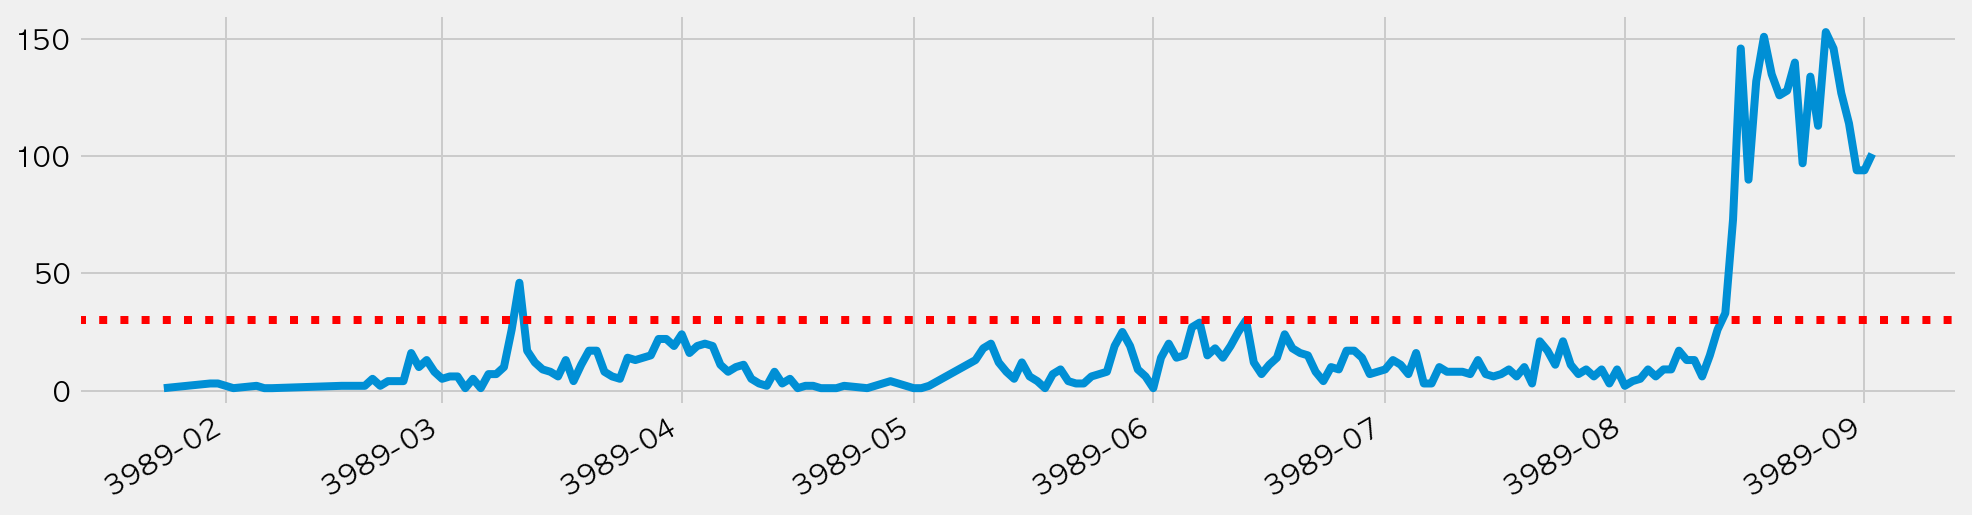

In [73]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [74]:
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4062,20412,9.01.,영등포구,-,광화문집회 관련,NaN,2020-09-01,9,36,09-01
1,4061,20413,9.01.,강동구,-,광진구 소재병원,NaN,2020-09-01,9,36,09-01
2,4060,20420,9.01.,광진구,-,광진구 소재병원,NaN,2020-09-01,9,36,09-01
3,4059,20399,9.01.,광진구,-,광진구 소재병원,NaN,2020-09-01,9,36,09-01
4,4058,20390,9.01.,강남구,-,서초구 장애인교육시설,NaN,2020-09-01,9,36,09-01
5,4057,NaN,9.01.,강남구,-,광진구 소재병원,NaN,2020-09-01,9,36,09-01
6,4056,20307,9.01.,강동구,-,성북구 사랑제일교회 관련,NaN,2020-09-01,9,36,09-01
7,4055,20411,9.01.,광진구,-,광진구 소재병원,NaN,2020-09-01,9,36,09-01
8,4054,20422,9.01.,기타,-,광진구 소재병원,NaN,2020-09-01,9,36,09-01
9,4053,20353,9.01.,강북구,-,성북구 요양시설,NaN,2020-09-01,9,36,09-01


In [75]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    193.000000
mean      21.046632
std       34.547415
min        1.000000
25%        5.000000
50%        9.000000
75%       17.000000
max      153.000000
Name: 월일, dtype: float64

In [76]:
# get 10 days of recent confirmed cases
day_count[-10:]

08-23     97
08-24    134
08-25    113
08-26    153
08-27    146
08-28    127
08-29    114
08-30     94
08-31     94
09-01    101
Name: 월일, dtype: int64

In [77]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-26    153
Name: 월일, dtype: int64

In [78]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-24"]
df_day.head(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
942,3120,17828,8.24.,노원구,-,확인 중,NaN,2020-08-24,8,35,08-24
943,3119,17903,8.24.,성동구,-,광화문집회 관련,NaN,2020-08-24,8,35,08-24
944,3118,17913,8.24.,광진구,-,광화문집회 관련,NaN,2020-08-24,8,35,08-24
945,3117,17876,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
946,3116,17866,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
947,3115,17656,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
948,3114,17618,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
949,3113,17598,8.24.,기타,-,녹색병원 관련,NaN,2020-08-24,8,35,08-24
950,3112,17594,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
951,3111,17553,8.24.,성북구,-,확인 중,NaN,2020-08-24,8,35,08-24


In [79]:
# Covid19 infection classified with patients' contact to the disease
number_of_paths = len(df["접촉력"].unique()) # get unique value for types of contagion route 
print(f"Total number of paths for infection: {number_of_paths}")
df["접촉력"].unique()

Total number of paths for infection: 226


array(['광화문집회 관련', '광진구 소재병원', '서초구 장애인교육시설', '성북구 사랑제일교회 관련', '성북구 요양시설',
       '기타 확진자 접촉', '도봉구 체육시설', '노원구 기도모임', '확인 중', '관악구 의원 관련',
       '타시도 확진자 접촉', '강서구 보안회사', '롯데리아 종사자 모임', '해외 접촉 추정', '순복음 강북교회',
       'JH글로벌 관련', '영등포구 권능교회', '구로구 아파트 관련', '제주 게스트하우스 관련', 'FA체대입시학원',
       '동작구 카드발급 업체 관련', '도봉구 체육시설 관련', '노원구 교회 관련', '강남구 소재 아파트',
       '노원구 빛가온교회 관련', '서초구 장애인 교육시설', '강동구 병원 관련', '동대문구 sk탁구클럽',
       '동작구 스터디카페', '극단 산 관련', '성북구 체대입시 관련', 'KT가좌지사 관련', '성북구 사랑제일교회',
       '타시도확진자 접촉', '동작구 소재 서울신학교', '마포구소재 군관련 사무실', '동작구 요양시설 관련',
       '용인시 우리제일교회 관련', '중랑구 소재 체육시설', '동대문구 SK탁구클럽', '여의도 순복음교회 관련',
       '중구 보험회사(현대해상)', '영등포구 권능교회 관련', '강서구 병원관련', '강동구 병원관련',
       '종로구 혜화경찰서 관련', '양천구 되새김교회 관련', '현대커머셜', '녹색병원 관련', '다래경매 관련',
       '영등포 IFC몰 오케스트로', '고양시 반석교회(케네디상가) 관련', '롯데 자산개발 관련', '골드트레인',
       '한양대병원', '은평구 헤어콕 관련', '강동구 어린이집', '은평구 성경공부모임', '관악구 요양병원',
       '고대 안암병원 관련', '마포구 푸본생명콜센터', '성동구 가족관련', '용인시 우리제일교회', '골드트레인 관련',
       '양천구 되새김 교회', '고

In [80]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [81]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [82]:
df["접촉력"].value_counts().head(20)

확인 중             680
성북구 사랑제일교회 관련    621
기타 확진자 접촉        452
해외 접촉 추정         369
타시도 확진자 접촉       143
이태원 클럽 관련        139
리치웨이 관련          119
광화문집회 관련          90
구로구 콜센터 관련        60
요양시설 관련           43
양천구 운동시설 관련       43
구로구 교회 관련         41
용인시 우리제일교회 관련     40
성북구 체대입시 관련       39
콜센터직원 접촉          37
수도권 개척교회 관련       37
강남구 사무실 관련        36
구로구 아파트 관련        35
용인시 우리제일교회        33
극단 산 관련           32
Name: 접촉력, dtype: int64

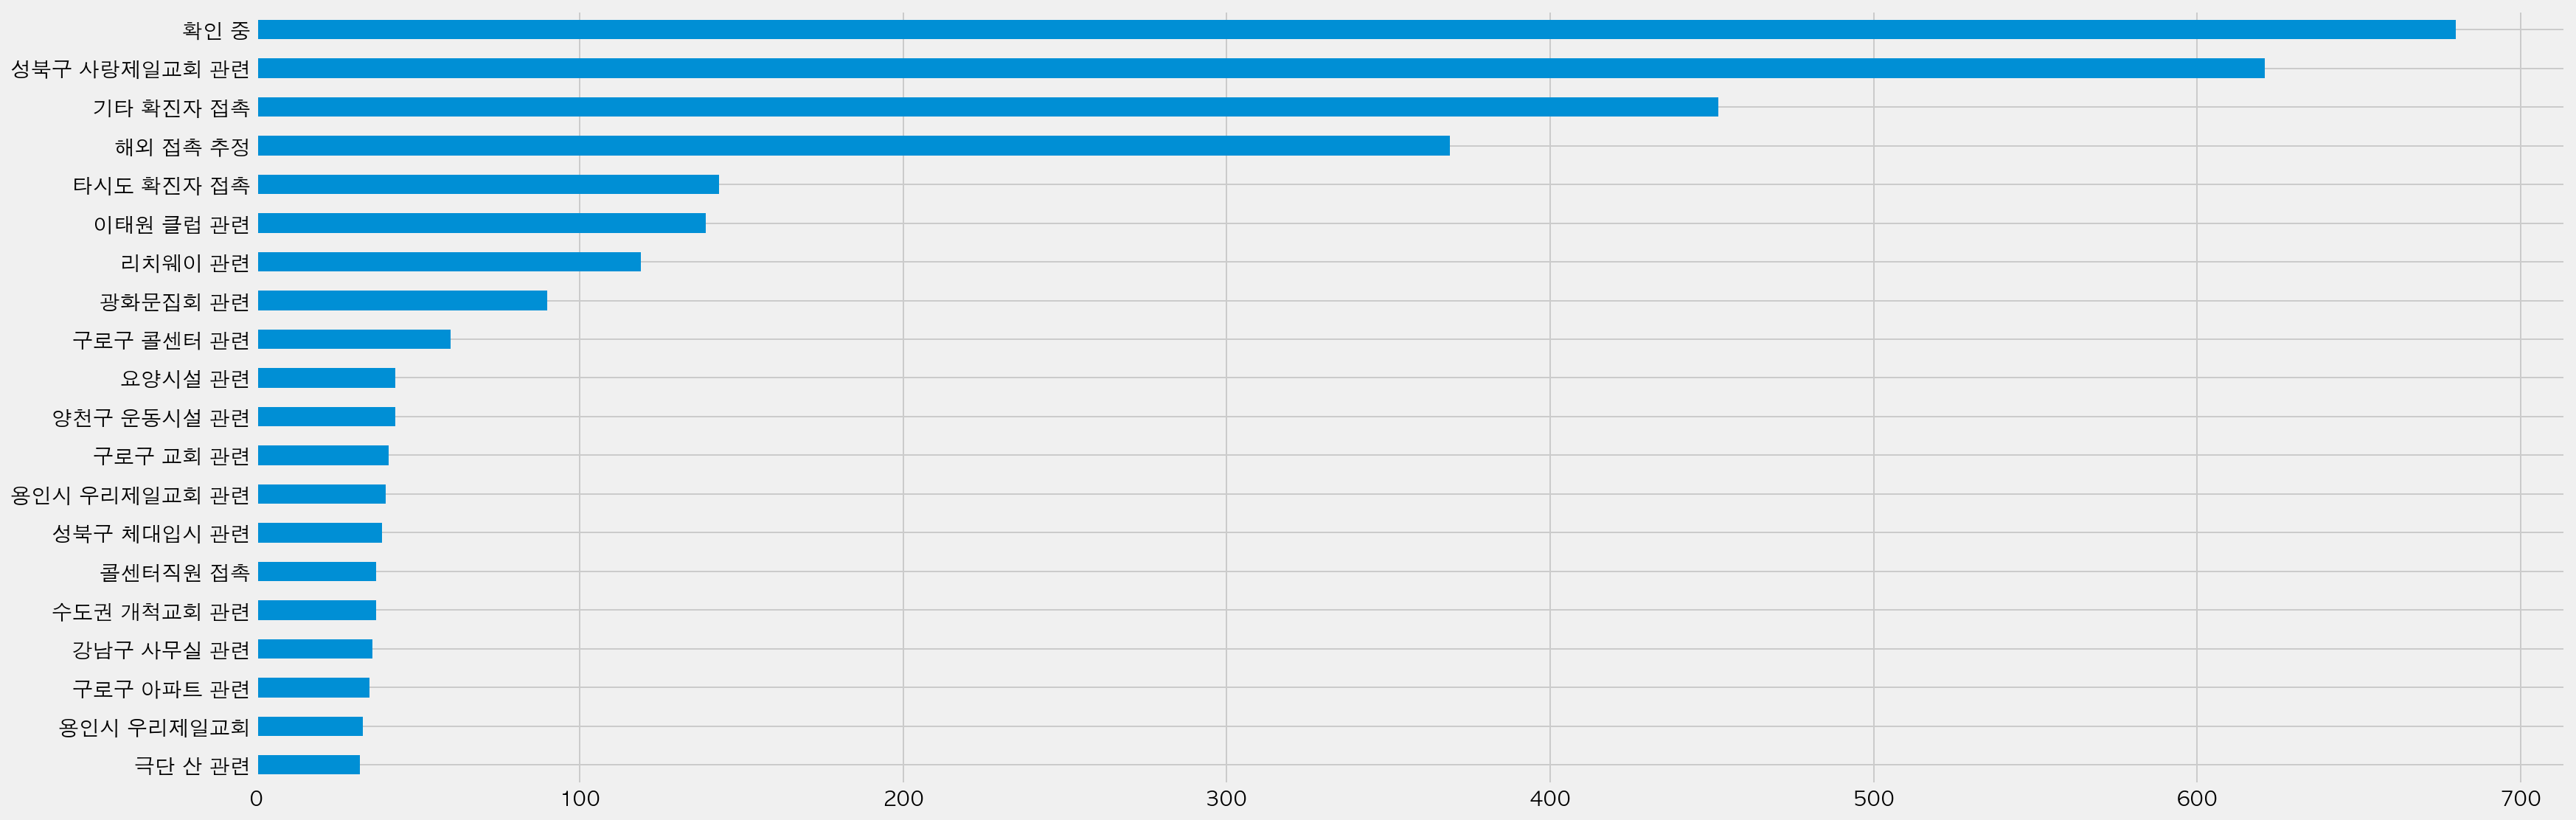

In [83]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [84]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")

In [85]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

확인 중             680
성북구 사랑제일교회 관련    621
기타 확진자 접촉        452
해외 접촉 추정         369
타시도 확진자 접촉       143
이태원 클럽 관련        139
리치웨이 관련          119
광화문집회 관련          90
구로구 콜센터 관련        60
요양시설 관련           43
양천구 운동시설 관련       43
구로구 교회 관련         41
용인시 우리제일교회 관련     40
성북구 체대입시 관련       39
콜센터직원 접촉          37
Name: 접촉력, dtype: int64

## 감염경로 불명

In [86]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
16,4046,20168,9.01.,기타,-,확인 중,NaN,2020-09-01,9,36,09-01
17,4045,NaN,9.01.,관악구,-,확인 중,NaN,2020-09-01,9,36,09-01
18,4044,19804,9.01.,도봉구,-,확인 중,NaN,2020-09-01,9,36,09-01
22,4040,20318,9.01.,양천구,-,확인 중,NaN,2020-09-01,9,36,09-01
26,4036,20405,9.01.,서대문구,-,확인 중,NaN,2020-09-01,9,36,09-01
...,...,...,...,...,...,...,...,...,...,...,...
4006,56,1768,2.25.,고양시,-,확인 중,퇴원,2020-02-25,2,9,02-25
4020,42,1370,2.25.,노원구,-,확인 중,퇴원,2020-02-25,2,9,02-25
4023,39,924,2.25.,평택,-,확인 중,퇴원,2020-02-25,2,9,02-25
4024,38,907,2.25.,관악구,-,확인 중,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

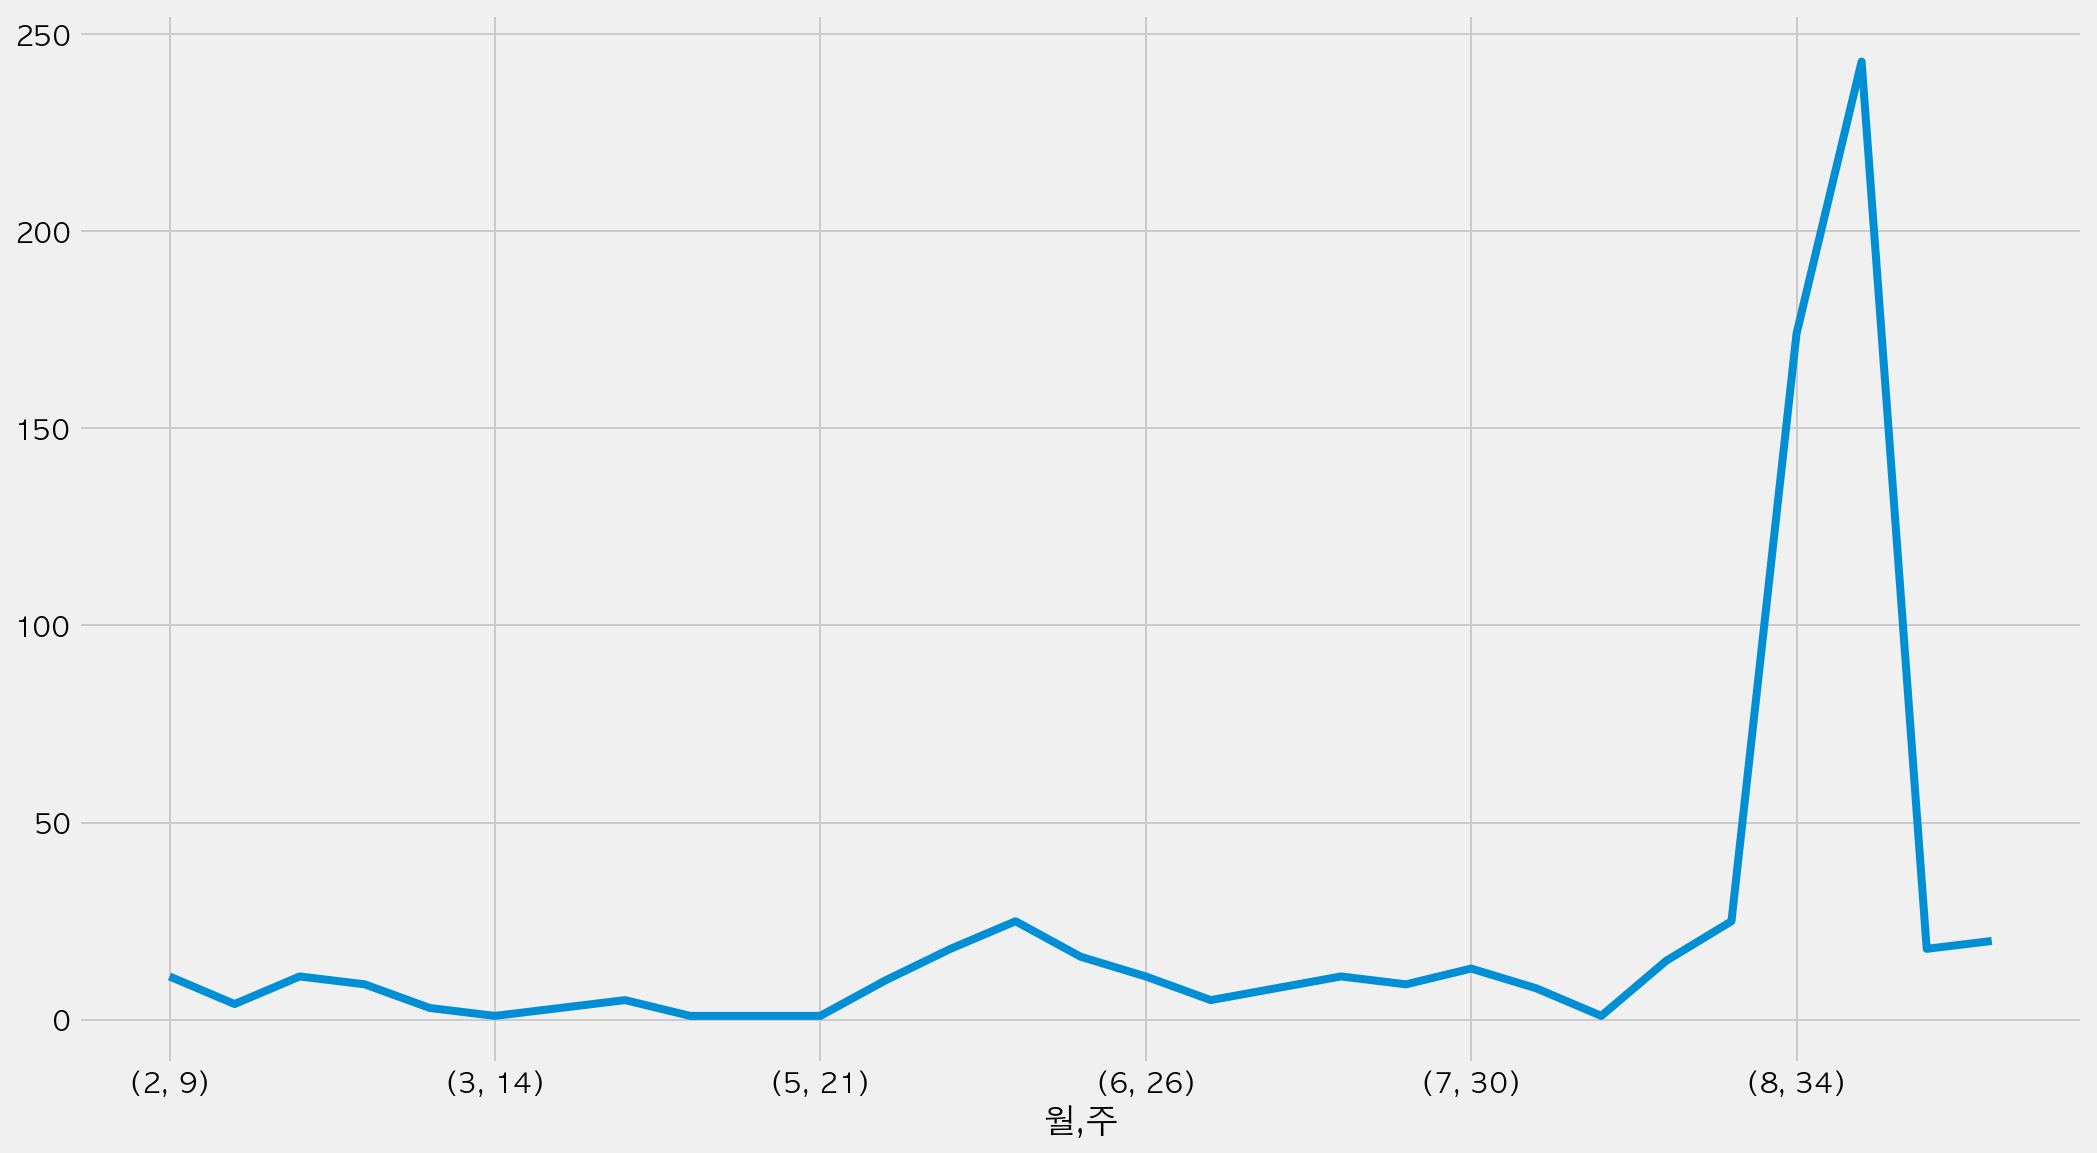

In [87]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [88]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
34,909
35,881
33,389
36,195
23,134


In [89]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
35,243
34,174
36,38
24,25
33,25


In [90]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [91]:
comparison[-4:]

,전체확진자수,불명확진수
33,389,25
34,909,174
35,881,243
36,195,38


<AxesSubplot:>

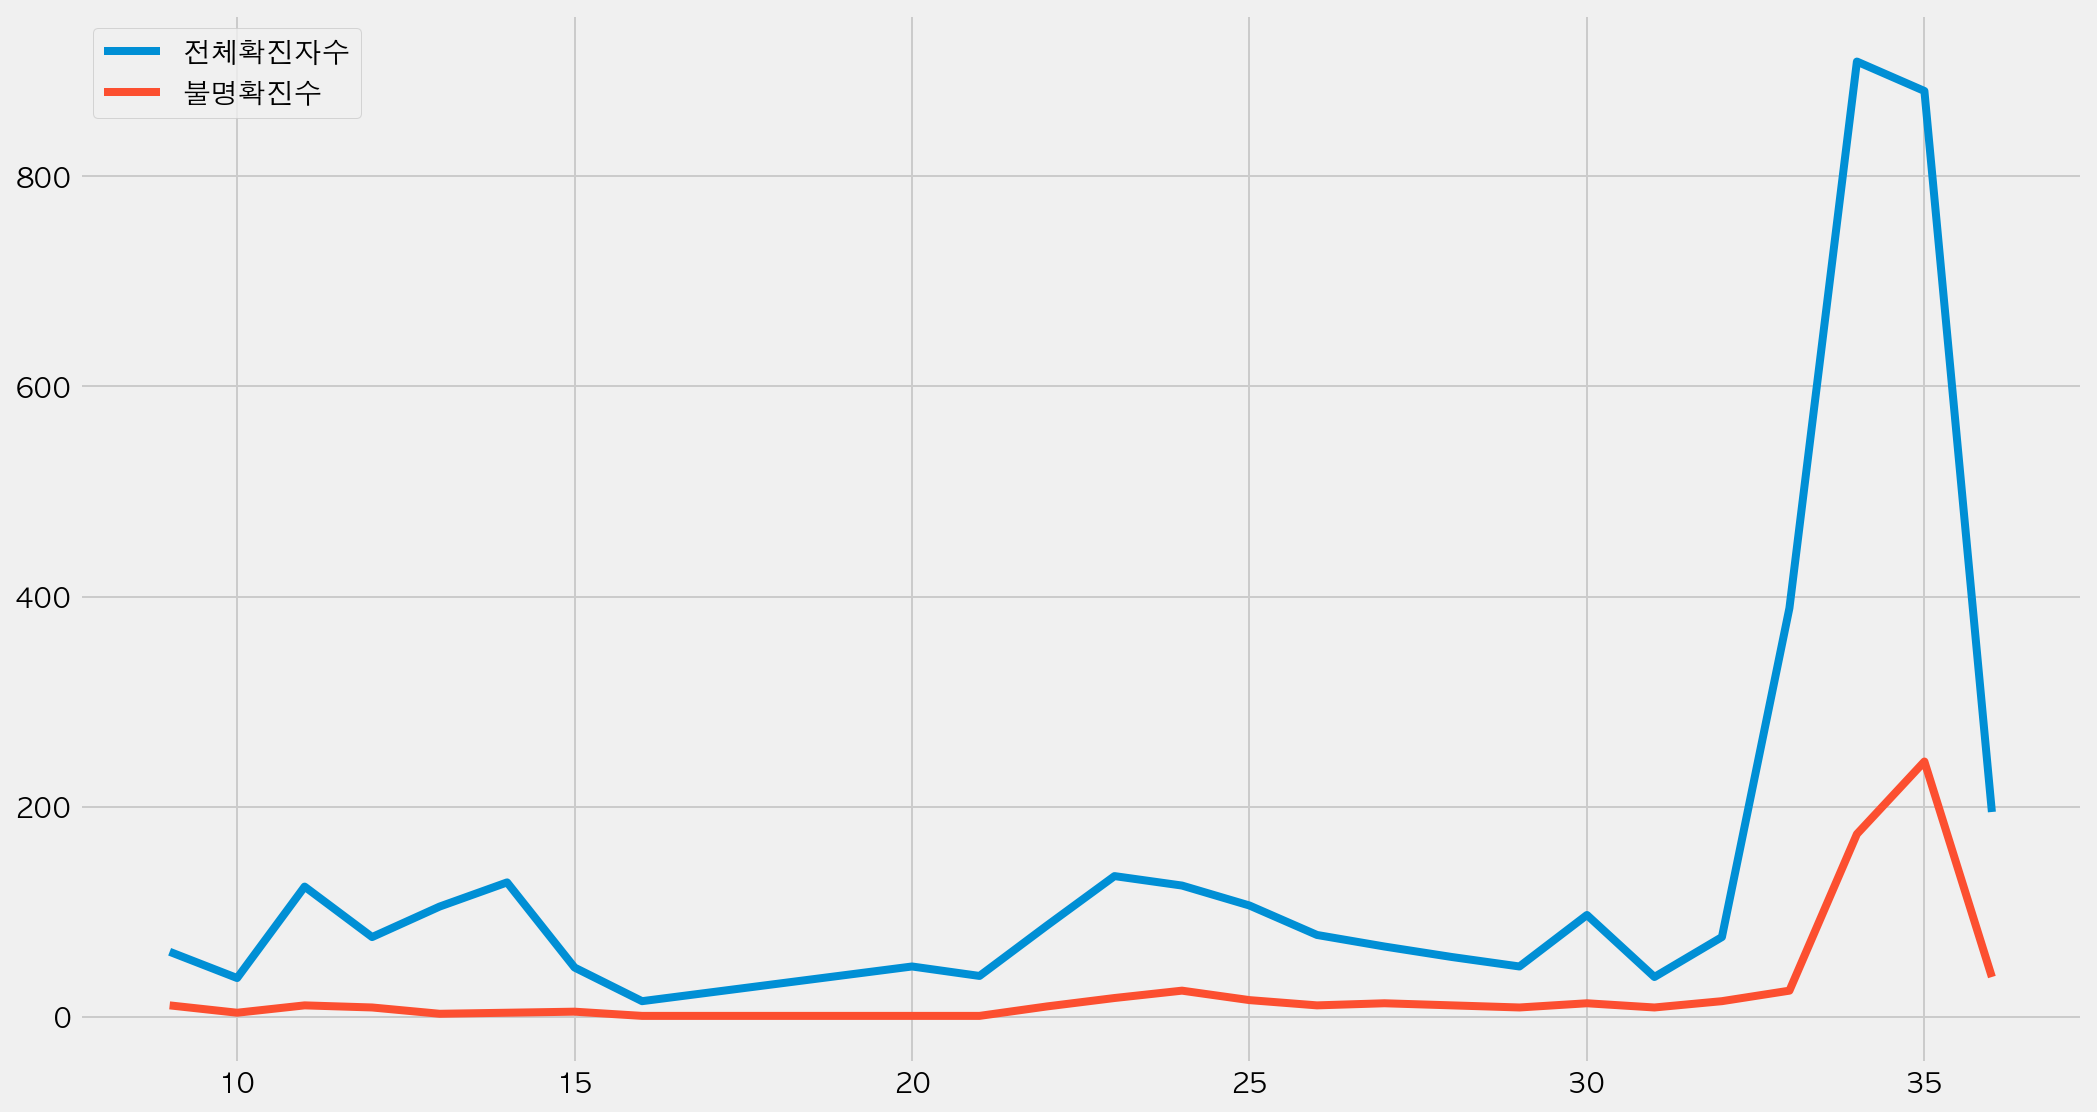

In [92]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [93]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [94]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    13.402062
31    23.684211
32    19.736842
33     6.426735
34    19.141914
35    27.582293
36    19.487179
dtype: float64

In [95]:
percentages[-4:]

33     6.426735
34    19.141914
35    27.582293
36    19.487179
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
19.141914191419144
27.582292849035188
19.48717948717949


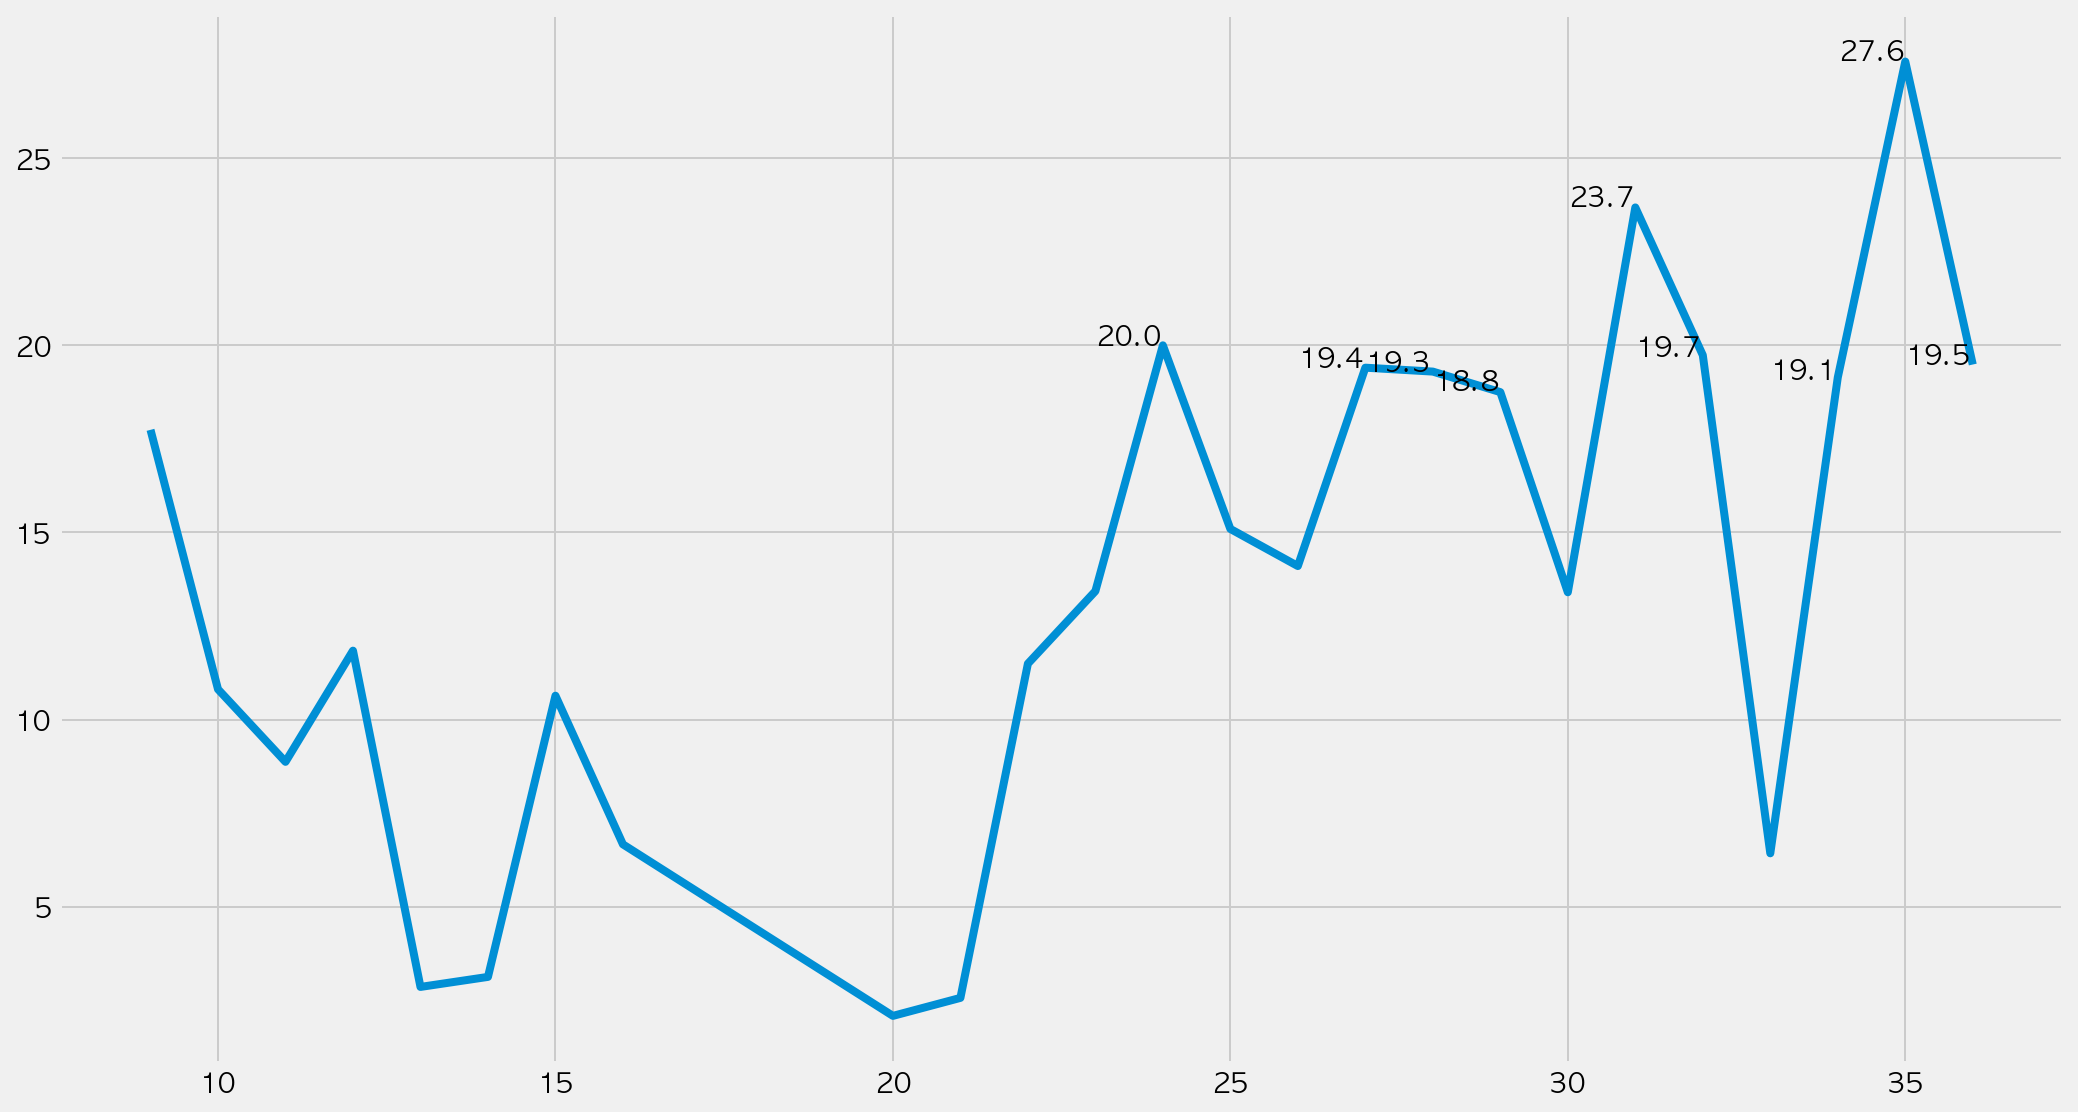

In [96]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [97]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')